In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("loanP_train.csv") #Reading the dataset in a dataframe using Pandas

In [3]:
df.head() # View a few top rows

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe() #Look at summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,578.000000,585.000000,550.00000
mean,5420.687813,1563.913055,145.434256,342.461538,0.84000
std,6169.168633,2456.618360,84.596463,64.868352,0.36694
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2874.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,126.500000,360.000000,1.00000
75%,5807.500000,2279.000000,165.000000,360.000000,1.00000
max,81000.000000,33837.000000,700.000000,480.000000,1.00000


<Axes: >

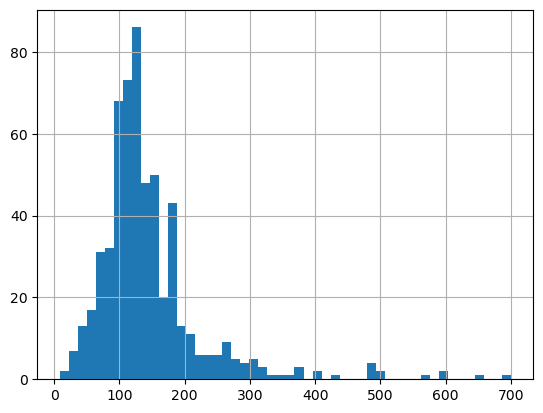

In [7]:
df['LoanAmount'].hist(bins=50) #displaying data on a histogram to show how data is distributed by column

<Axes: >

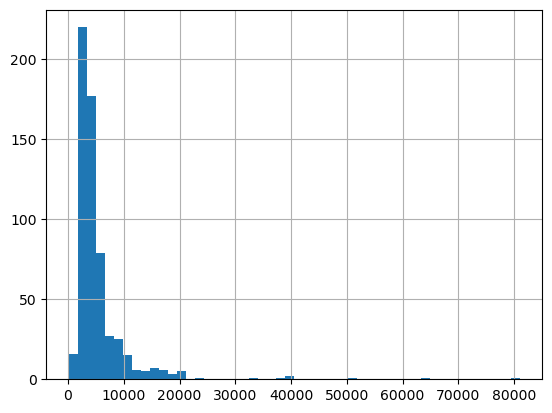

In [9]:
df['ApplicantIncome'].hist(bins=50) #displaying data on a histogram to show how data is distributed by column

In [11]:
df.apply(lambda x: sum(x.isnull()), axis=0) #number of missing values in each column

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_31272\1977403596.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


In [13]:
df.loc[:, 'LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean()) # filling missing data with mean

In [15]:
df.apply(lambda x: sum(x.isnull()), axis=0) #number of missing values in each column

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df.loc[:, 'Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) # filling missing data with mean
df.loc[:, 'Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean()) # filling missing data with mean

In [21]:
df.mean() #basic math operations, cumulative summation etc.

TypeError: can only concatenate str (not "int") to str

In [23]:
df.dtypes

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [31]:
# Extracting only the independent variables
X = df.iloc[:, [8,10]].values #credit history and loan amount

# Extracting only the dependent variables
y = df.iloc[:, 12].values #loan status

In [33]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [45]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [47]:
# Fitting logistics regression to training dataset
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train) #by calling fit method, your training the model X_train and y_train

LogisticRegression(random_state=0)

In [49]:
# Predicting(Testing) the Test set results after training
y_pred = classifier.predict(X_test) # predicting X_test if they will get a loan or not
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # measure how accurate the matrix
cm

array([[ 18,  27],
       [  2, 103]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # measuring accuracy thru accuracy_score

0.8066666666666666